###Pivot table
<p>The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimentional summarization of the data. </p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
#Find the average bill that are paid by male and female
df.groupby('sex')[['total_bill']].mean()

<ipython-input-4-f44286c1a160>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [5]:
#Find the average  paid bill based on smoker and non-smoker male female
df.groupby(['sex','smoker'])[['total_bill']].mean()

<ipython-input-5-f975de88a9c3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean()


total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [6]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

<ipython-input-6-19160ad1a132>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [7]:
#Using pivot table we get the same answer above question
df.pivot_table(index='sex',columns='smoker',values='total_bill')  #If we do not pass any aggregate functions bydefault it perform mean()

<ipython-input-7-b06aa1ebeb80>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [10]:
#using specific aggregate function
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')

df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')

<ipython-input-10-cb122035b568>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum')
<ipython-input-10-cb122035b568>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='count')


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [17]:
#All cols together
df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip','size'])

<ipython-input-17-5bc6aab03fab>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip','size'])


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [16]:
df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip','size'])['tip']

<ipython-input-16-9d8268c8e152>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values=['total_bill','tip','size'])['tip']


smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [18]:
#multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')

<ipython-input-18-61b0cfd202a9>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],values='total_bill')


day                 Thur               Fri                Sat        Sun
time               Lunch Dinner      Lunch  Dinner     Dinner     Dinner
sex    smoker                                                           
Male   Yes     19.171000    NaN  11.386667  25.892  21.837778  26.141333
       No      18.486500    NaN        NaN  17.475  19.929063  20.403256
Female Yes     19.218571    NaN  13.260000  12.200  20.266667  16.540000
       No      15.899167  18.78  15.980000  22.750  19.003846  20.824286

In [19]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'])

<ipython-input-19-a49550a7cc27>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'])


size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [20]:
#Passing dectionary
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})

<ipython-input-20-ff830ef9810c>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'})


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [21]:
#margins  : calculate total sum for each row and each column
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

<ipython-input-21-71ebd1ba7e4e>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [22]:
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

<ipython-input-22-494bb64846f3>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)


size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

In [4]:
df1 = pd.read_csv('/content/expense_data.csv')
df2 = pd.read_csv('/content/titanic.csv')

In [5]:
df1.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [6]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df1['Category'].value_counts()

,count
Category,
Food,156
Other,60
Transportation,31
Apparel,7
Household,6
Allowance,6
Social Life,5
Education,1
Salary,1


In [10]:
#Object(means String) to integer convert
df1['Date'] = pd.to_datetime(df1['Date'])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [18]:
df1['Date'] = df1['Date'].dt.month_name()

AttributeError: Can only use .dt accessor with datetimelike values

In [24]:
df1['Date'].dt.month_name()

AttributeError: Can only use .dt accessor with datetimelike values

In [19]:
df1.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,March,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,March,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,March,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,March,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,March,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


<Axes: xlabel='Date'>

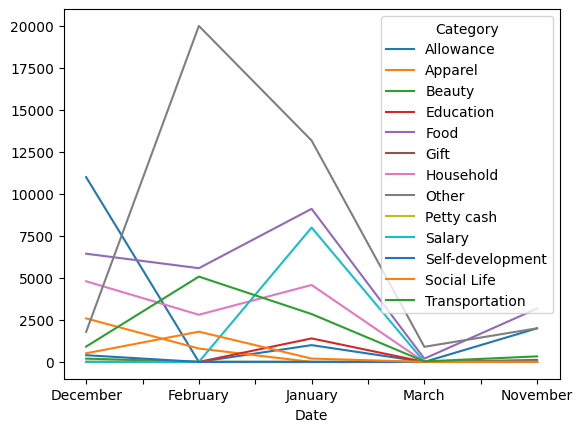

In [28]:
df1.pivot_table(index='Date',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='Date'>

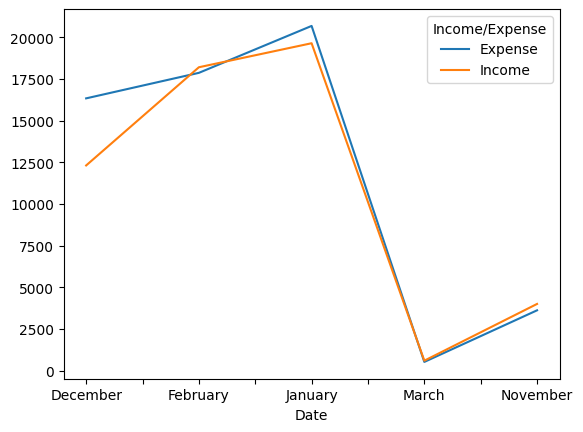

In [29]:
df1.pivot_table(index='Date',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()

<Axes: xlabel='Date'>

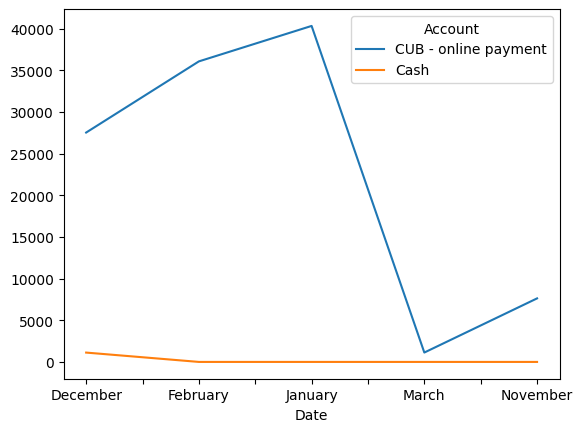

In [30]:
df1.pivot_table(index='Date',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

In [ ]:
#plotting graphs
#Using pivot_table we can make a power full graphs